In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


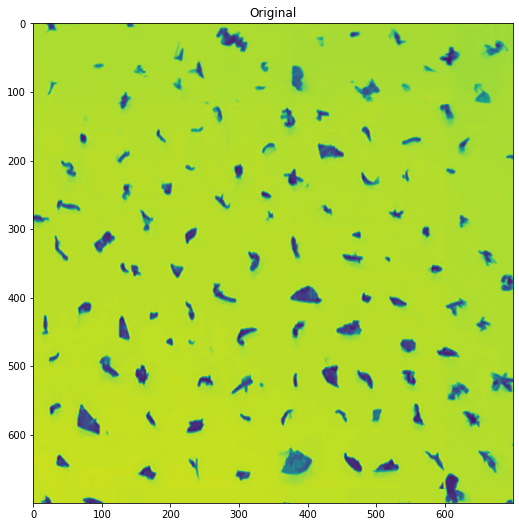

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

path = '/content/drive/MyDrive/Colab Notebooks/3.png'
image = cv2.imread(path,0)
plt.figure(figsize=(30, 30))
plt.subplot(3, 2, 1)
plt.title("Original")
plt.imshow(image)

Count of Contours  = 137


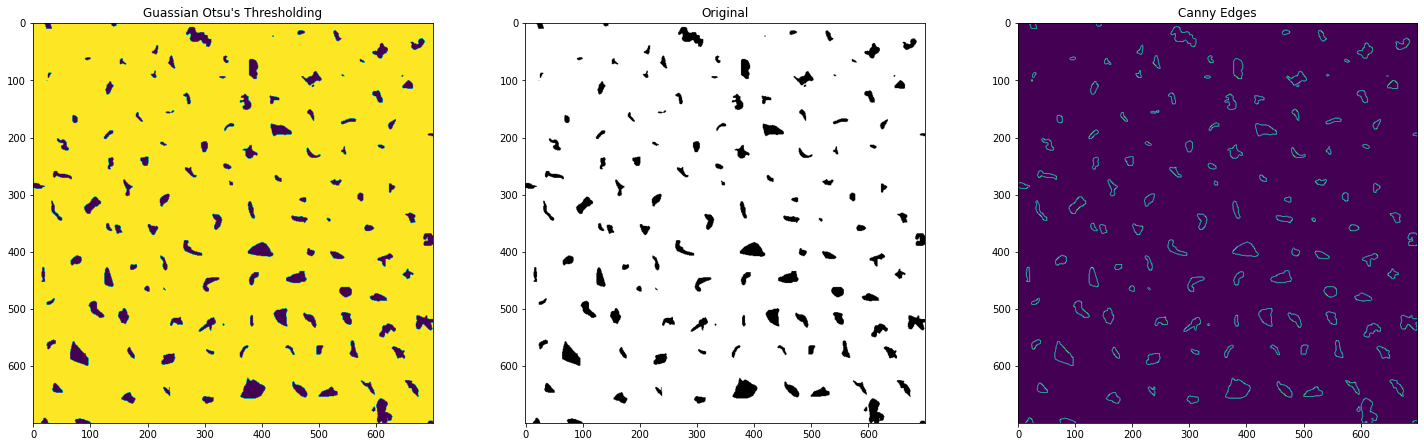

In [ ]:
blur = cv2.GaussianBlur(image, (5,5), 0)
_, th3 = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
plt.figure(figsize=(25, 25))
plt.subplot(3, 3, 1)
plt.title("Guassian Otsu's Thresholding")
plt.imshow(th3)



image1 = th3
image1 = cv2.cvtColor(th3, cv2.COLOR_BGR2RGB)

plt.subplot(3, 3, 2)
plt.title("Original")
plt.imshow(image1)
# Grayscale
gray = cv2.cvtColor(image1,cv2.COLOR_BGR2GRAY)
# Canny edges
edged = cv2.Canny(gray, 30, 200)
plt.subplot(3, 3, 3)
plt.title("Canny Edges")
plt.imshow(edged)
# Finding Contours
contour, hier = cv2.findContours(edged, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
print("Count of Contours  = " + str(len(contour)))


In [ ]:
#Classification Hardcoded if-else function
def morphology(asp_ratio, mean_intensity, area_bb, total_pixels):
  if(asp_ratio < 0.4):
    if(mean_intensity > 130):
      morph = 'Fibre'
    else:
      morph = 'Line'
  elif((total_pixels/area_bb) < 0.6):
    if(mean_intensity > 130):
      morph = 'Fibre'
    else:
      morph = 'Line'
  elif((total_pixels/area_bb) >= 0.6):
    if(asp_ratio > 0.7):
      morph = 'Pellet'
    else:
      morph = 'Fragment'
  else:
    morph = 'Fragment'

  return morph





Count of Detected Particles  = 127


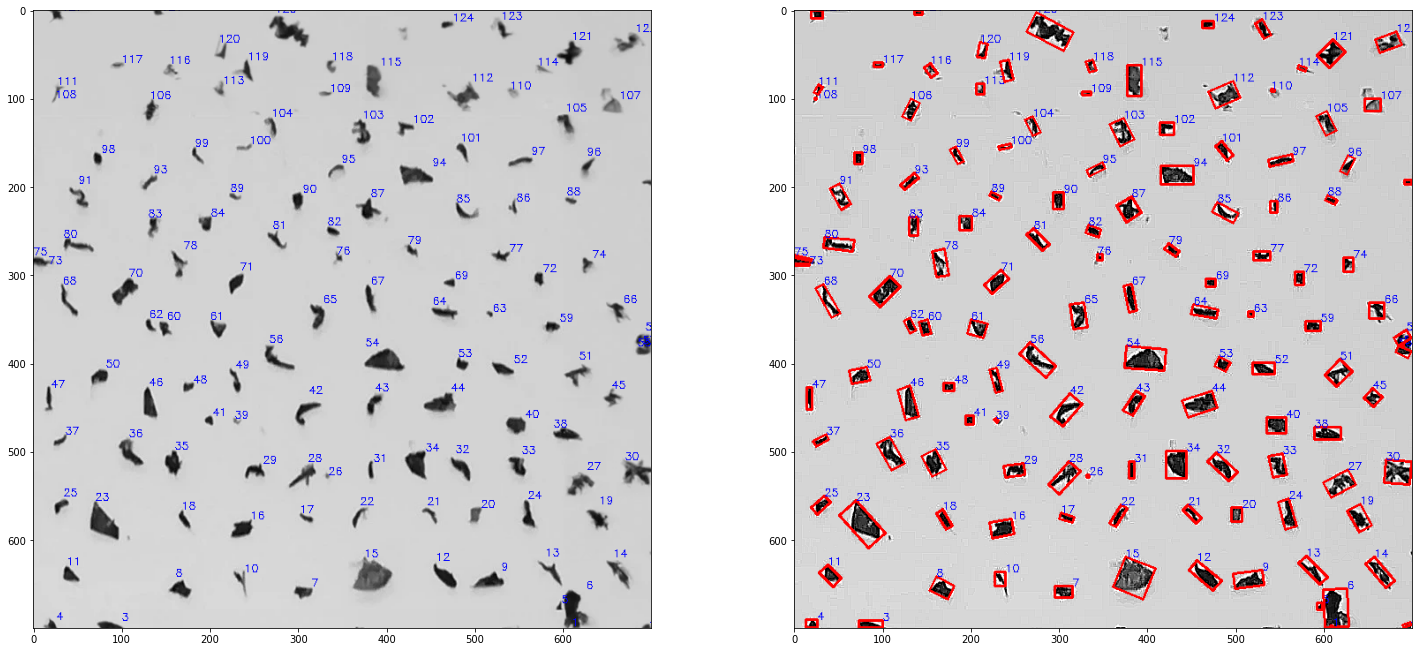

In [ ]:
from operator import countOf
# img=th3
img = cv2.imread(path)
img3 = cv2.imread(path)
# sharpens the image
kernel_sharpening = np.array([[-1,-1,-1],
                              [-1,9,-1],
                              [-1,-1,-1]])
img = cv2.filter2D(img, -1, kernel_sharpening)

ctr=0
dimensionlist=[]
for cnt in contour:
  # compute the bounding rectangle of the contour
  rect = cv2.minAreaRect(cnt)
  box = cv2.boxPoints(rect)
  box = np.int0(box)
  x,y = box[1]
  w1,h1 = rect[1]
  x = int(x)  #coordinates of top right of bounding box
  y = int(y)
  w = int(min(w1,h1)) #height and width of bounding box
  h = int(max(w1,h1))
  if(h==0 or w==0):
    continue
  asp_ratio = round(w/h,2)   #aspect ratio
  area_bb = round(w*h,2)  #bounding box area
  area = cv2.contourArea(cnt)   #contour area
  area = round(area,2)
  perimeter = cv2.arcLength(cnt,True)   #contour perimeter
  perimeter = round(perimeter,2)
  if(area == 0):
    continue

  #Mean pixel intensity & No. of pixels of particle
  mask = np.zeros(img.shape[:2],np.uint8)
  cv2.drawContours(mask, [cnt],0,255,-1)
  pixelpoints = cv2.findNonZero(mask)
  total_pixels = pixelpoints.shape[0]
  mean_intensity = round(cv2.mean(img, mask = mask)[0],2)

  #Classifying the Microplastics
  morph = morphology(asp_ratio, mean_intensity, area_bb, total_pixels)


  ctr=ctr+1
  temp=[]
  temp.append(ctr)
  temp.append(asp_ratio)
  temp.append(area_bb)
  temp.append(area)
  temp.append(perimeter)
  temp.append(total_pixels)
  temp.append(round(total_pixels/area_bb,2))
  temp.append(mean_intensity)
  temp.append(morph)
  temp.append(ctr)

  dimensionlist.append(temp)

   # draw the bounding rectangle
  height=str(h)
  width=str(w)
  img = cv2.drawContours(img,[box],0,(255,0,0),2)
  cv2.putText(img, str(ctr), (x,y), cv2.FONT_HERSHEY_SIMPLEX, 0.4, (0,0,255), 1)
  cv2.putText(img3, str(ctr), (x,y), cv2.FONT_HERSHEY_SIMPLEX, 0.4, (0,0,255), 1)

print("Count of Detected Particles  = " +str(ctr))

# display the image with bounding rectangle drawn on it
plt.figure(figsize=(25, 25))
plt.subplot(2, 2, 1)
plt.imshow(img3)
plt.subplot(2,2,2)
plt.imshow(img)



In [ ]:
from prettytable import PrettyTable
import csv
l = dimensionlist

table = PrettyTable(['S.No', 'Aspect Ratio(w/h)', 'Area(Bounding Box)', 'Area', 'Perimeter', 'No. of pixels in Particle', 'Pixels/Area of B.Box', 'Mean Pixel Intensity', 'Morphology', 'S No.'])

for rec in l:
    table.add_row(rec)

print(table)



+------+-------------------+--------------------+--------+-----------+---------------------------+----------------------+----------------------+------------+-------+
| S.No | Aspect Ratio(w/h) | Area(Bounding Box) |  Area  | Perimeter | No. of pixels in Particle | Pixels/Area of B.Box | Mean Pixel Intensity | Morphology | S No. |
+------+-------------------+--------------------+--------+-----------+---------------------------+----------------------+----------------------+------------+-------+
|  1   |        0.75       |         12         |  0.5   |    15.9   |             8             |         0.67         |        210.62        |   Pellet   |   1   |
|  2   |        0.62       |        273         |  2.0   |   87.11   |             42            |         0.15         |        170.12        |   Fibre    |   2   |
|  3   |        0.53       |        190         |  4.0   |   80.43   |             39            |         0.21         |        168.56        |   Fibre    |   3   |
|  4

In [ ]:
import pandas as pd
df = pd.DataFrame(dimensionlist)
df.columns=["S.No","Height","Width"]

In [ ]:
df[["Height","Width"]].describe()

,Height,Width
count,1097.000000,1097.000000
mean,93.328168,99.123974
std,64.546027,66.153611
min,0.000000,1.000000
25%,47.000000,47.000000
50%,87.000000,94.000000
75%,129.000000,134.000000
max,541.000000,402.000000
